# Set up and installation of modules

In [3]:
# Uncomment as needed

!pip install scikit-learn
#!pip install tensorflow
#!pip install gymnasium
#!pip install pygame
#!pip install stable-baselines3

# Principal Component Analysis

In [4]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Text(0, 0.5, 'signal (V)')

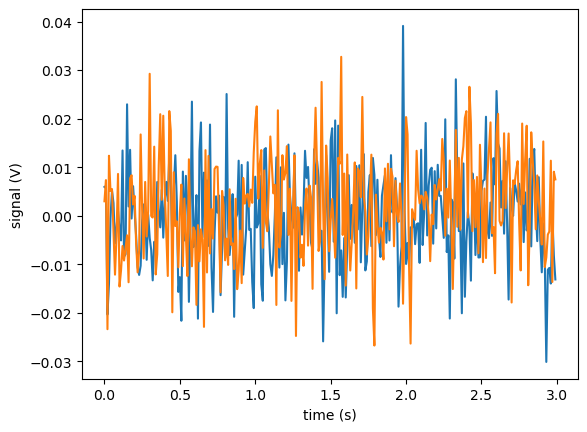

In [54]:
ones = np.loadtxt("ones.txt")
zeros = np.loadtxt("zeros.txt")

time_stamps = ones[:,0]
data_ones = ones[:,1:]
data_zeros = zeros[:,1:]

num_ones_samples = data_ones.shape[1]
num_zeros_samples = data_zeros.shape[1]

plt.plot(t, data_ones[:,2])
plt.plot(t, data_zeros[:,2])
plt.xlabel("time (s)")
plt.ylabel("signal (V)")

(2000, 300)
The first component explains 1.4967826212524566% of the variance, and the second explains 0.6103404444860211%


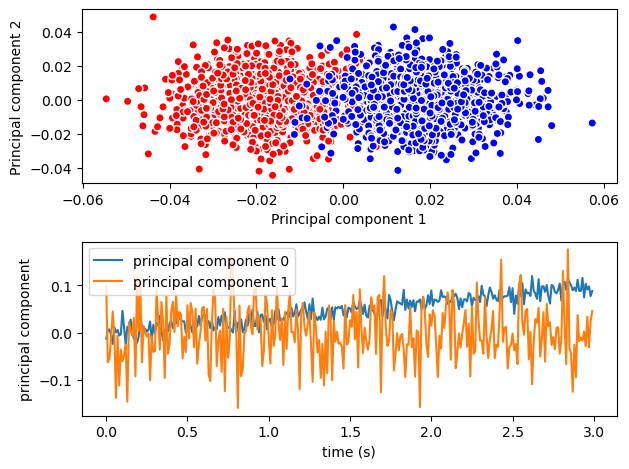

In [57]:
X = np.hstack([data_ones, data_zeros]).T
print(X.shape)

colors = ['r'] * num_ones_samples + ['b'] * num_zeros_samples
pca = PCA(n_components=2)
pca.fit(X)

Y = pca.transform(X)
print(f"The first component explains {pca.explained_variance_ratio_[0]*100}% of the variance, and the second explains {pca.explained_variance_ratio_[1]*100}%")

fig, ax = plt.subplots(2)
ax[0].scatter(Y[:, 0], Y[:, 1], c=colors, edgecolor="w")
ax[0].set_xlabel("Principal component 1")
ax[0].set_ylabel("Principal component 2")

ax[1].plot(t, pca.components_[0], label="principal component 0")
ax[1].plot(t, pca.components_[1], label="principal component 1")
ax[1].set_xlabel("time (s)")
ax[1].set_ylabel("principal component")
ax[1].legend()

fig.tight_layout()

# Supervised learning with a feedforward neural network

In [58]:
from tensorflow import keras
from keras.utils import to_categorical

This cell will download the MNIST dataset if it hasn't already been downloaded :)

This image is a 5
This corresponds to the one-hot vector:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


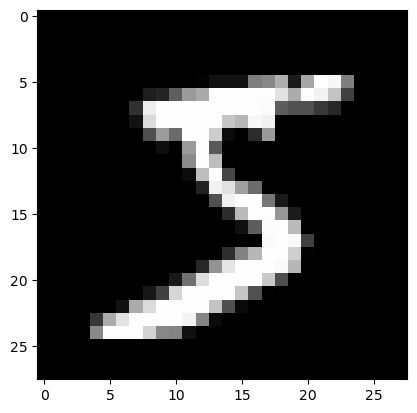

In [98]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Show one image
plt.imshow(x_train[0], cmap='gray')
print(f"This image is a {y_train[0]}")

# Turn the answers into one-hot vectors
y_train = to_categorical(y_train, num_classes=10)
print(f"This corresponds to the one-hot vector: ", y_train[0])

# Reshape each image from a 28x28 2D array into a 1D array of size 28*28
x_train = np.reshape(x_train, (-1, 28*28))
# Normalize the inputs to lie between 0 and 1
x_train = x_train/256.0

# Reshape the test set
x_test = np.reshape(x_test, (-1,28*28))/256
y_test = to_categorical(y_test, num_classes=10)

### Build a small neural network

In [108]:
model = keras.Sequential()
model.add(keras.layers.Dense(40, input_shape=(28*28,)))
model.add(keras.layers.Dense(10))

# Finalize the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Train it!
history = model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 327us/step - loss: 0.0492 - accuracy: 0.8086
Epoch 2/10
1875/1875 [==============================] - 1s 339us/step - loss: 0.0409 - accuracy: 0.8444
Epoch 3/10
1875/1875 [==============================] - 1s 325us/step - loss: 0.0400 - accuracy: 0.8464
Epoch 4/10
1875/1875 [==============================] - 1s 326us/step - loss: 0.0398 - accuracy: 0.8501
Epoch 5/10
1875/1875 [==============================] - 1s 322us/step - loss: 0.0398 - accuracy: 0.8486
Epoch 6/10
1875/1875 [==============================] - 1s 321us/step - loss: 0.0396 - accuracy: 0.8489
Epoch 7/10
1875/1875 [==============================] - 1s 320us/step - loss: 0.0396 - accuracy: 0.8498
Epoch 8/10
1875/1875 [==============================] - 1s 323us/step - loss: 0.0395 - accuracy: 0.8505
Epoch 9/10
1875/1875 [==============================] - 1s 319us/step - loss: 0.0394 - accuracy: 0.8508
Epoch 10/10
1875/1875 [==============================] - 1s 317u

### Test individual cases

1/1 [==============================] - 0s 11ms/step
This is a(n) 4


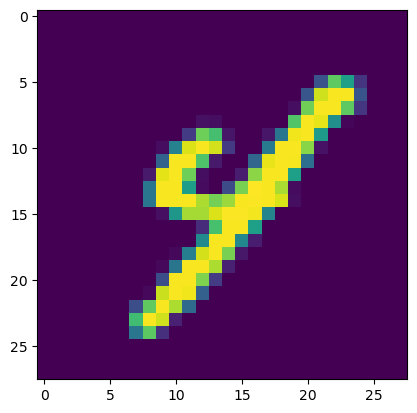

In [103]:
check = np.random.randint(0, len(x_test))

plt.imshow(np.reshape(x_test[check], (28,28)))
answer = np.argmax(model.predict(np.reshape(x_test[check], (1, 28*28))))
print(f"This is a(n) {answer}")

In [111]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(test_accuracy)

313/313 - 0s - loss: 0.0392 - accuracy: 0.8560 - 88ms/epoch - 280us/step
0.8560000061988831


## CNN

In [70]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 48s 0us/step


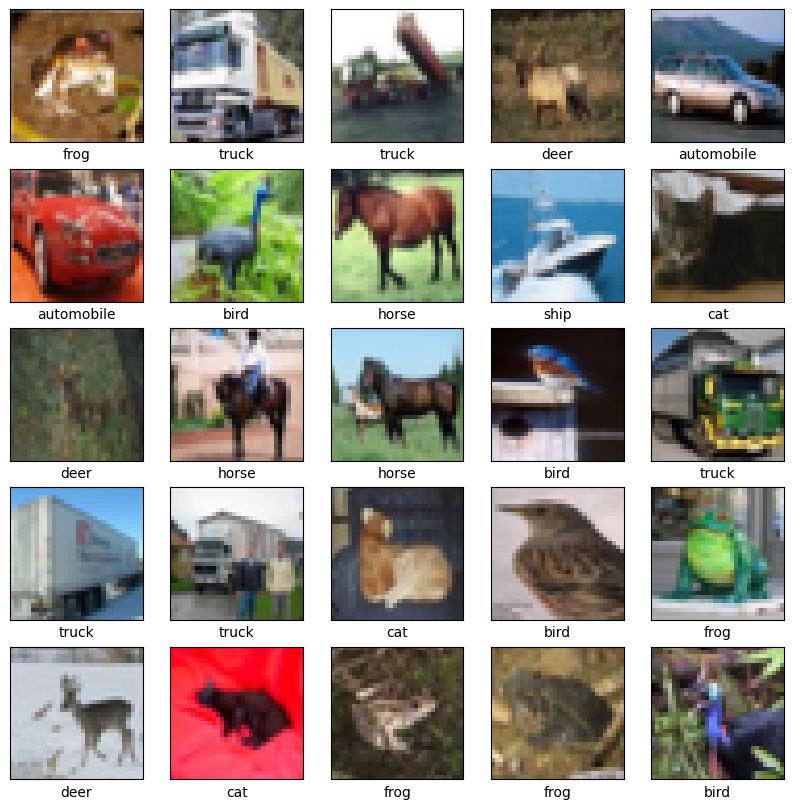

In [112]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [117]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10))

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 1.4654 - accuracy: 0.4786 - val_loss: 1.2962 - val_accuracy: 0.5469
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1847 - accuracy: 0.5863 - val_loss: 1.2285 - val_accuracy: 0.5668
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0813 - accuracy: 0.6229 - val_loss: 1.1049 - val_accuracy: 0.6164
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0095 - accuracy: 0.6505 - val_loss: 1.0689 - val_accuracy: 0.6274
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9510 - accuracy: 0.6678 - val_loss: 1.0471 - val_accuracy: 0.6340
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9051 - accuracy: 0.6851 - val_loss: 1.0598 - val_accuracy: 0.6328
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8630 - accuracy: 0.6997 - val_loss: 1.0469 - val_accuracy:

313/313 - 0s - loss: 1.0550 - accuracy: 0.6450 - 339ms/epoch - 1ms/step
0.6449999809265137


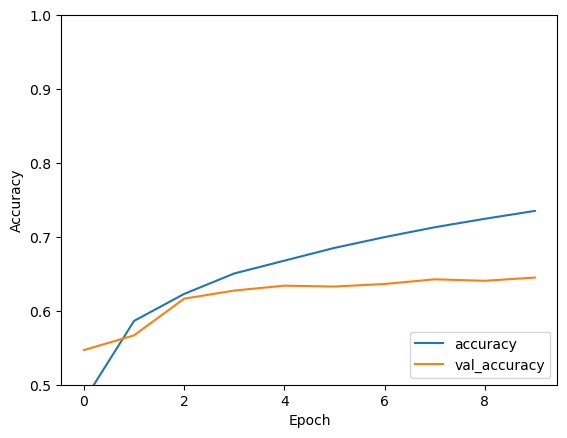

In [118]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

# Unsupervised learning with a feedforward neural network

https://keras.io/examples/generative/conditional_gan/

# Reinforcement learning

In [5]:
import gymnasium as gym
env = gym.make("CartPole-v1", render_mode=None)

observation, info = env.reset()
for _ in range(1000):
    action = env.action_space.sample()  # agent policy that uses the observation and info
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        observation, info = env.reset()

env.close()

In [6]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=25000)

In [7]:
env = gym.make("CartPole-v1", render_mode="human")
observation, info = env.reset()
while True:
    action, _states = model.predict(observation)
    observation, reward, terminated, truncated, info = env.step(action)

KeyboardInterrupt: 